# 인공지능 logistic regression 실습
## hearts.csv 사용

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,  confusion_matrix, log_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("../datasets/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
categorical_columns = ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = ['target']

df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [59]:
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [60]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

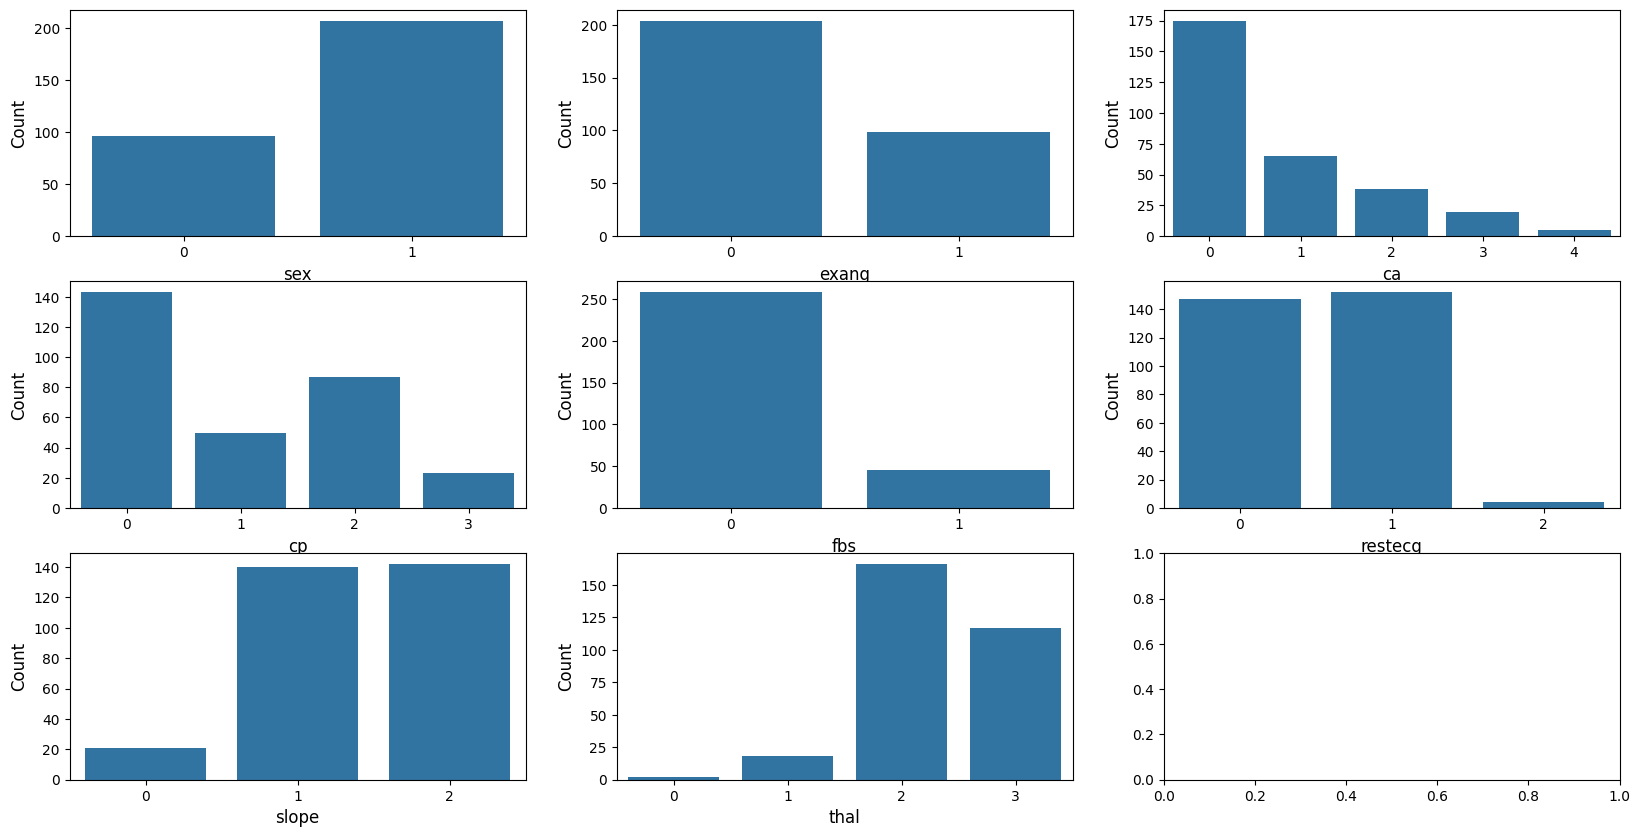

In [61]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 10))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x = feature, data = df)
    plt.ylabel('Count', fontsize = 12)
    plt.xlabel(feature, fontsize = 12)

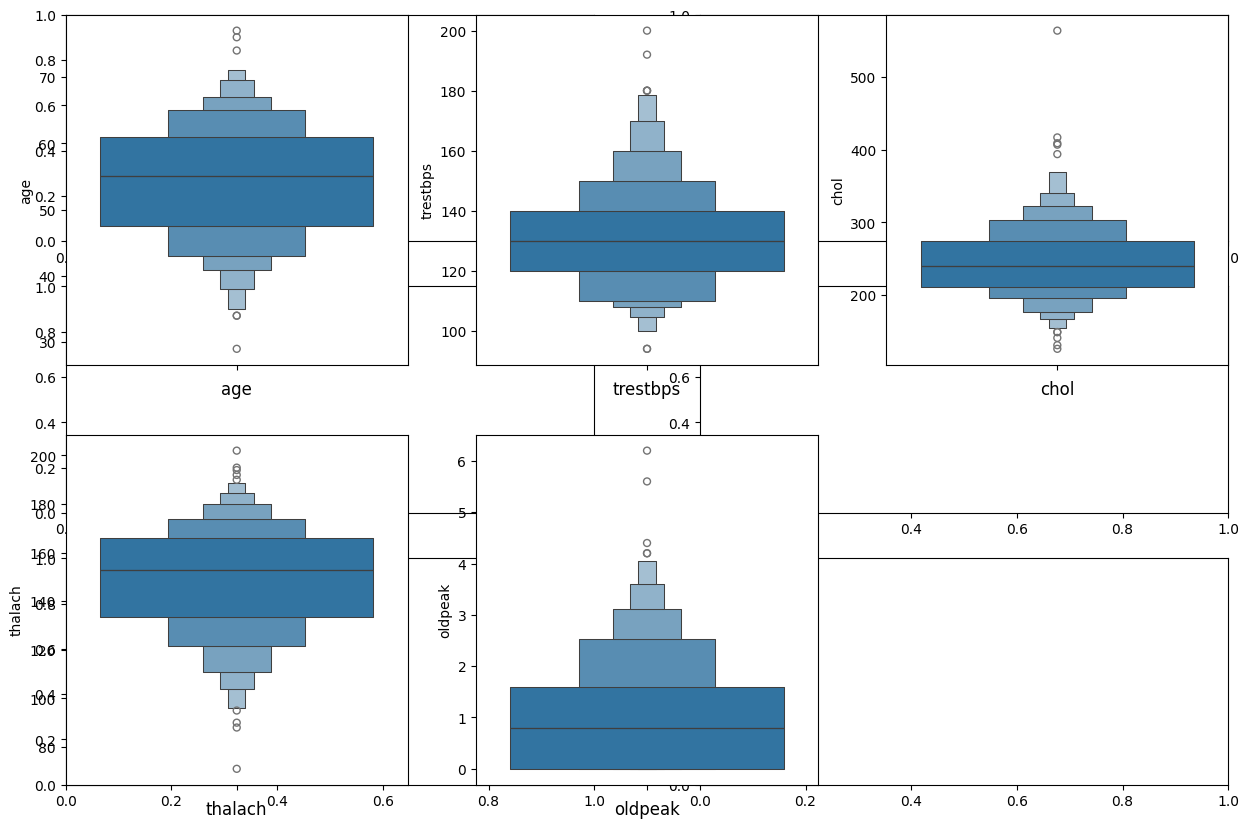

In [62]:
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (15, 10))
for i, feature in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(y = feature, data = df)
    plt.xlabel(feature, fontsize = 12)

<Axes: xlabel='target', ylabel='count'>

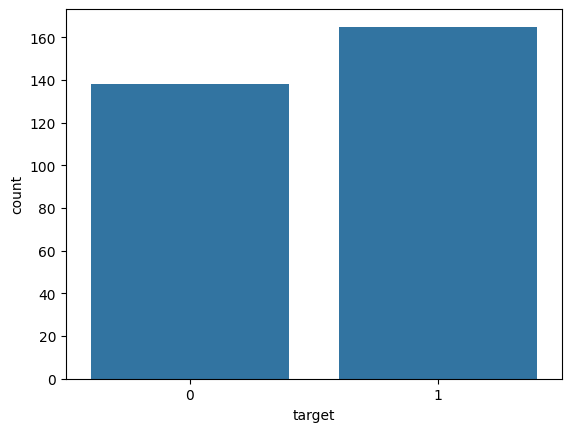

In [63]:
sns.countplot(x = "target", data = df)

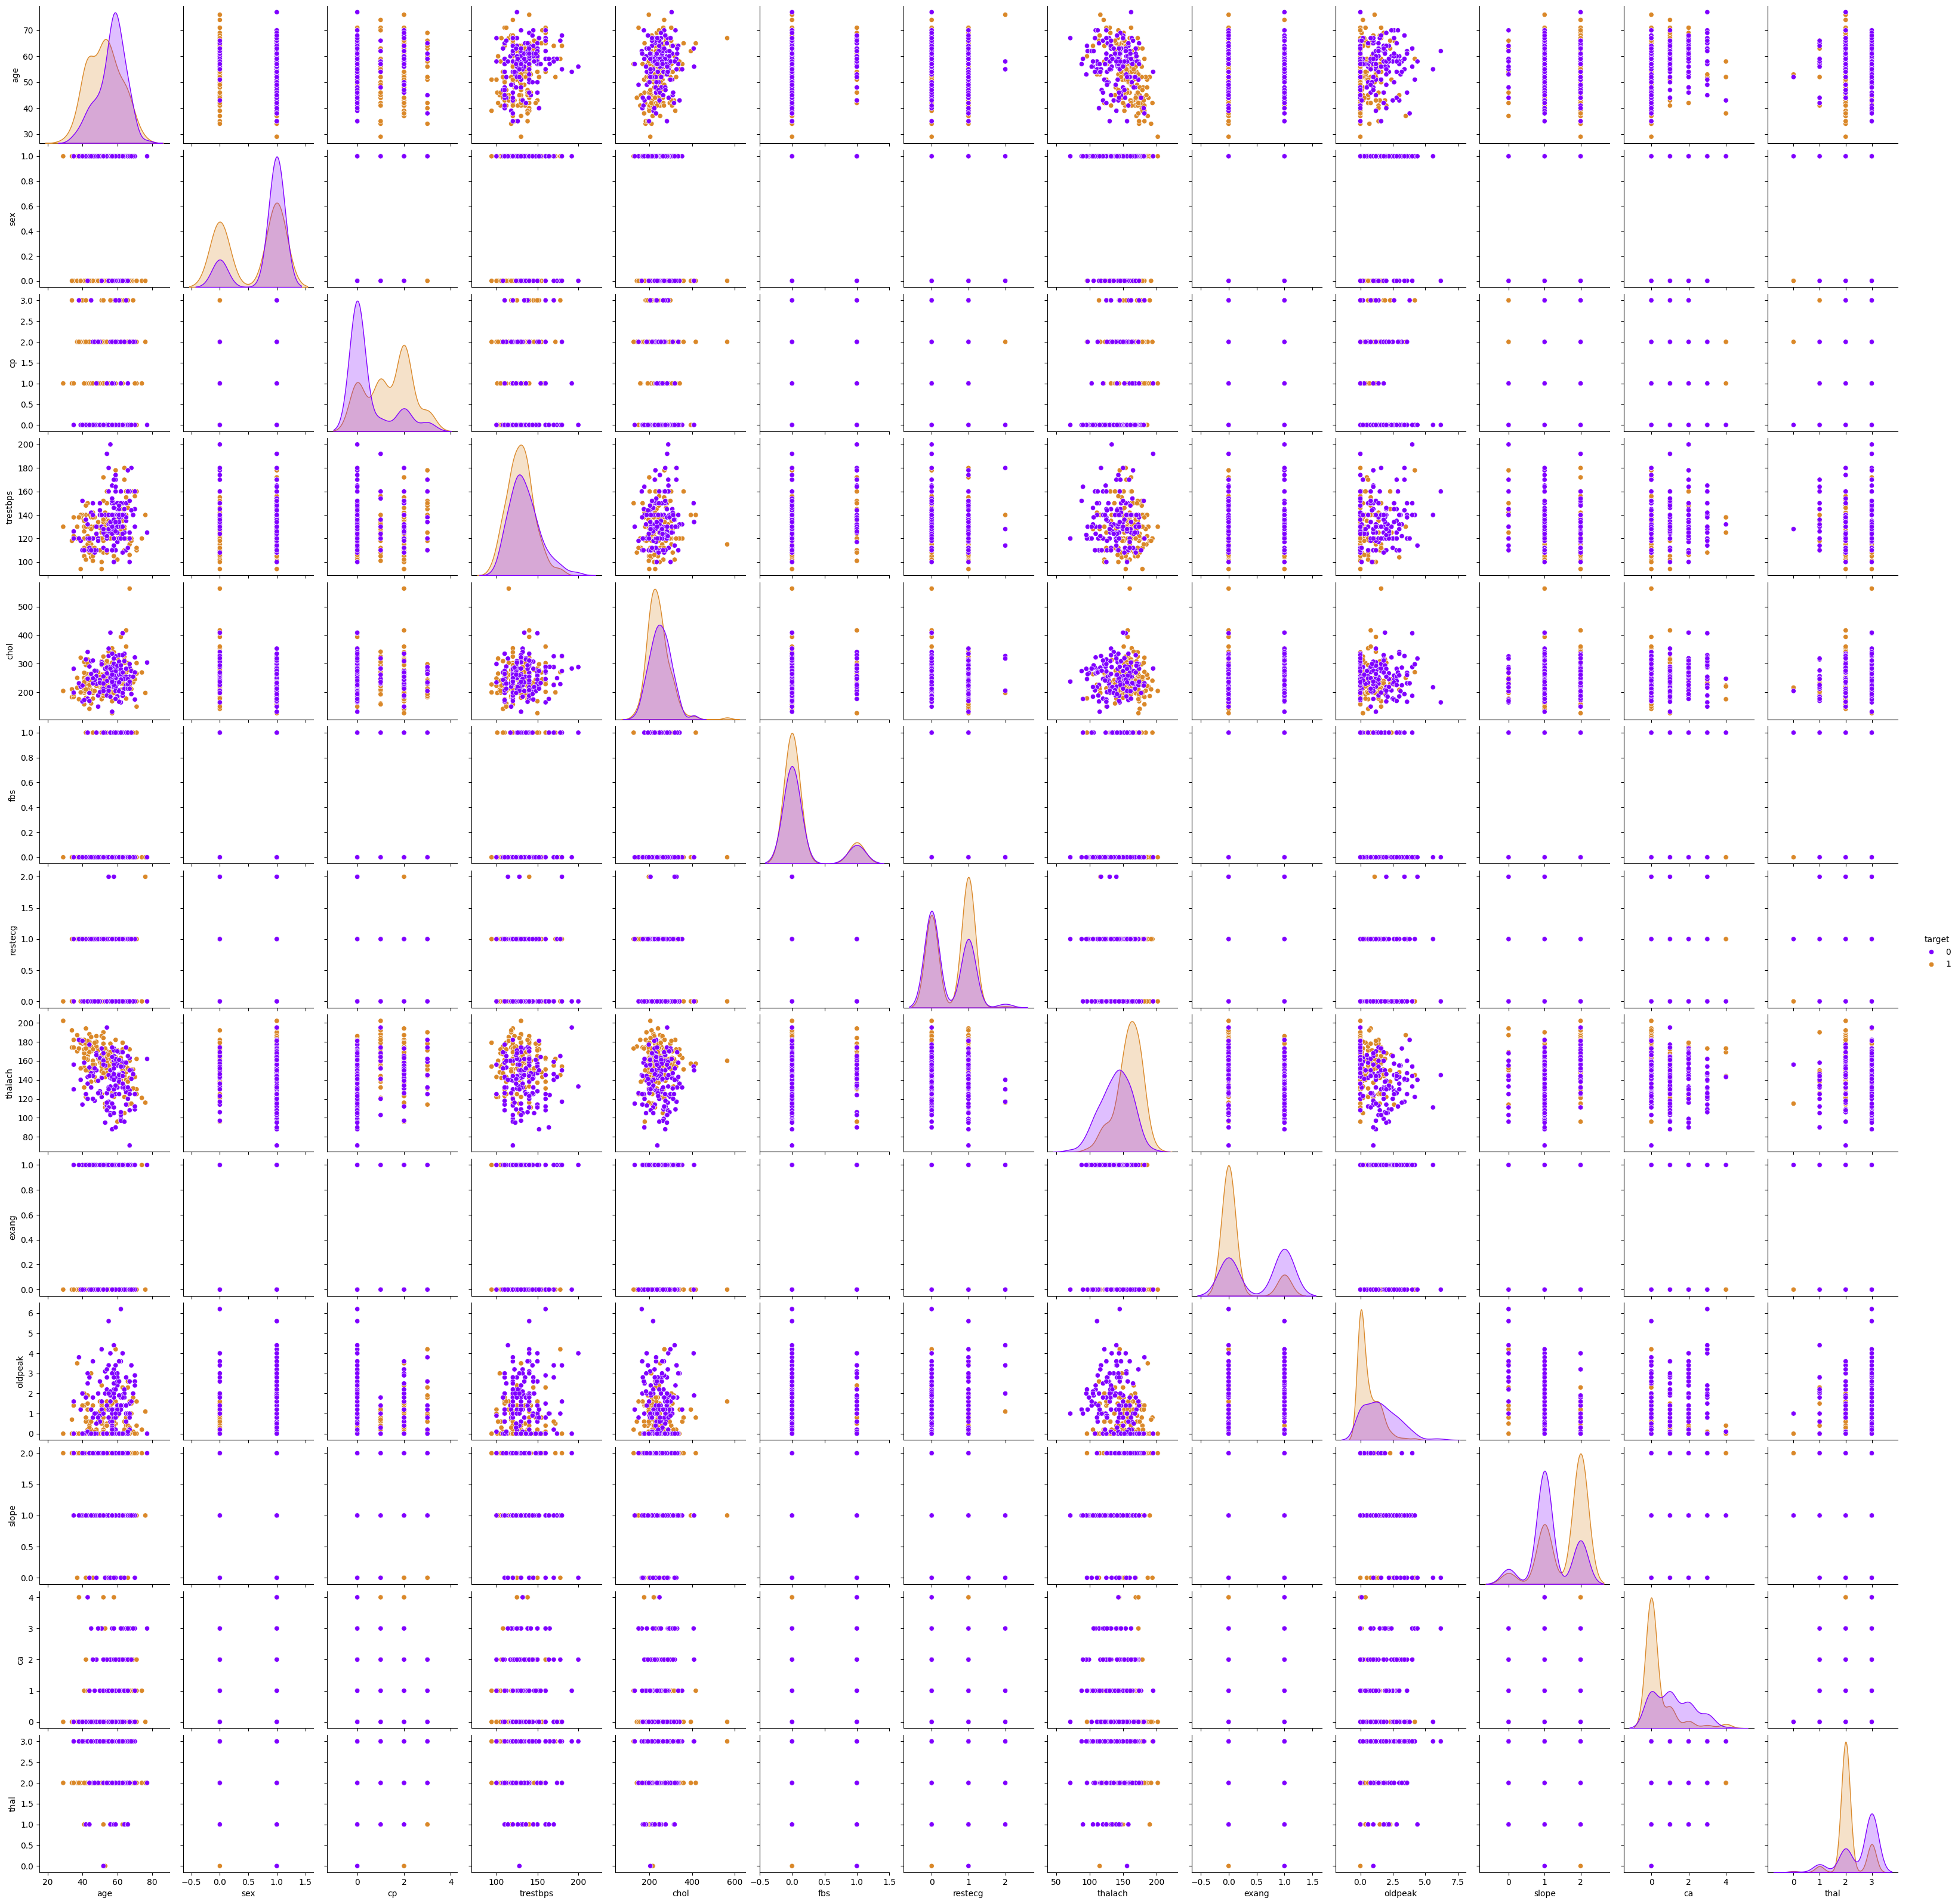

In [64]:
sns.pairplot(df, hue = 'target', palette = ["#8000ff", "#da8829"])
plt.show()

In [65]:
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
X = df.drop(['target'], axis = 1)
y = df[['target']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(penalty = None, C = 0.00001, max_iter = 10)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

print(f'The train accuracy score of logistic regression is {accuracy_score(y_train, model.predict(X_train)):.2f}')
print(f'The test accuracy score of logistic regression is {accuracy_score(y_test, y_pred):.2f}')

The train accuracy score of logistic regression is 0.63
The test accuracy score of logistic regression is 0.74


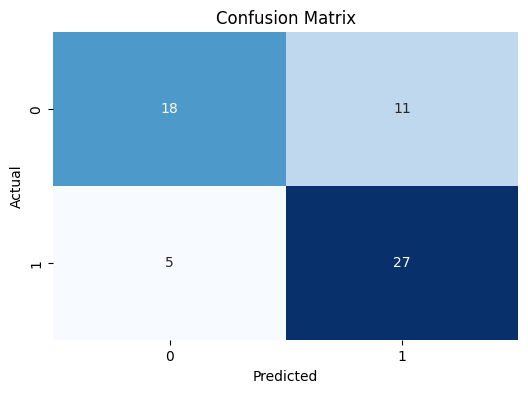

In [70]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [78]:
y_pred_proba_train = model.predict_proba(X_train)
loss = log_loss(y_train, y_pred_proba_train)
loss

0.6125210433205961